# Introduction

In this lab, we will learn how to estimate and visualize the variance of the Receiver Operating Characteristic (ROC) metric using cross-validation in Python. ROC curves are used in binary classification to measure the performance of a model by plotting the true positive rate (TPR) against the false positive rate (FPR). We will use the Scikit-learn library to load the iris dataset, create noisy features, and classify the dataset with Support Vector Machine (SVM). We will then plot the ROC curves with cross-validation and calculate the mean Area Under the Curve (AUC) to see the variability of the classifier output when the training set is split into different subsets.

# Load and prepare data

First, we will load the iris dataset using the Scikit-learn library. The iris dataset contains 3 classes of iris plants, and we will binarize the dataset by dropping one class to create a binary classification problem. We will also add noisy features to make the problem harder.

In [1]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# add noisy features
random_state = np.random.RandomState(0)
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

# Classification and ROC analysis

Next, we will run an SVM classifier with cross-validation and plot the ROC curves fold-wise. We will use StratifiedKFold from Scikit-learn to generate the cross-validation splits. We will also calculate the mean AUC of the ROC curves and see the variability of the classifier output by plotting the standard deviation of the TPRs.

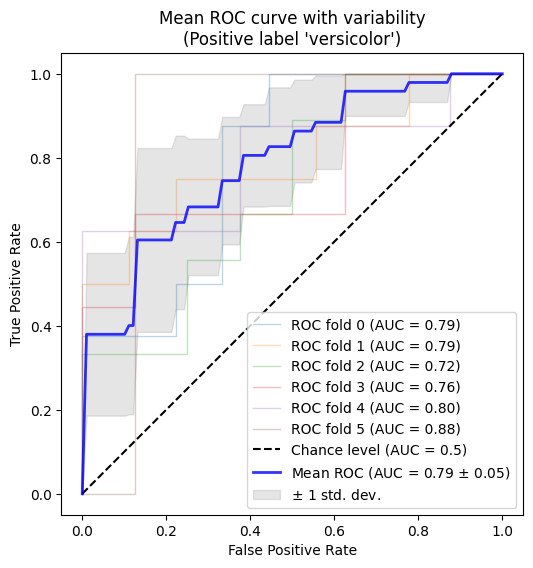

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

n_splits = 6
cv = StratifiedKFold(n_splits=n_splits)
classifier = svm.SVC(kernel="linear", probability=True, random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
        plot_chance_level=(fold == n_splits - 1),
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()

# Summary

In this lab, we learned how to estimate and visualize the variance of the Receiver Operating Characteristic (ROC) metric using cross-validation in Python. We loaded the iris dataset, created noisy features, and classified the dataset with SVM. We then plotted the ROC curves with cross-validation and calculated the mean AUC to see the variability of the classifier output when the training set is split into different subsets. The ROC curves can help us evaluate the performance of a binary classifier and see the trade-off between true positives and false positives. Cross-validation can help us estimate the variability of the classifier output and choose the best model for our problem.